# Visualizing Baseball Salaries

This is a small notebook that does a simple visualization of Major League Baseball players' salary trends, using a dataset we've seen in previous weeks of this course.

## Load the dataset

First, we load the dataset we're familiar with, and remember what it contains.

In [1]:
import pandas as pd
df = pd.read_csv( 'baseball-salaries-simplified.csv' )
df.head()

,name,pos,team,year,salary
0,Darryl Strawberry,OF,LAD,1991,3800000
1,Kevin Mitchell,OF,SF,1991,3750000
2,Will Clark,1B,SF,1991,3750000
3,Mark Davis,P,KC,1991,3625000
4,Eric Davis,OF,CIN,1991,3600000


## Filter the dataset

Just as an example, we'll focus our attention on third basemen in the years from 2000 to 2010, inclusive.

In [2]:
just_2000s = (df.year >= 2000) & (df.year <= 2010)
just_third_base = df.pos == '3B'
focus = df[just_2000s & just_third_base]
focus.head()

,name,pos,team,year,salary
597,Alex Rodriguez,3B,NYY,2004,22000000
631,Alex Rodriguez,3B,NYY,2005,26000000
991,Chipper Jones,3B,ATL,2001,10333333
1015,Matt D. Williams,3B,ARI,2000,8500000
1071,Robin Ventura,3B,NYM,2000,8000000


## Create a table of percentiles

I'm interested in seeing trends in the entire dataset.  There are so many data points that if we plotted them all, the graph would be quite busy.  So I'll plot the various percentiles of the data over time instead.  To do so, we must first compute what those percentiles are.

In [3]:
# Which years do we care about?
years = range( 2000, 2011 )

# We'll store the results in a new DataFrame.
df_pcts = pd.DataFrame( { "year" : years } )

# How to compute a percentile in a given year:
def percentile_in_year ( year, percent ):
    return focus[focus.year == year].salary.quantile( percent/100 )

# Fill the DataFrame using that function.
for percent in range( 0, 110, 10 ):
    df_pcts[percent] = [ percentile_in_year( year, percent ) for year in years ]

# Make years the index.
df_pcts.index = df_pcts.year
del df_pcts['year']

# Change units to millions of dollars.
df_pcts /= 1000000

# See result.
df_pcts

,0,10,20,30,40,50,60,70,80,90,100
year,,,,,,,,,,,
2000,0.200,0.21320,0.24100,0.28250,0.470000,0.681250,0.950000,1.377500,3.546667,6.180000,8.500000
2001,0.200,0.22230,0.29400,0.56750,0.915000,1.275000,2.280000,3.350000,5.350000,6.980000,10.333333
2002,0.200,0.22900,0.32900,0.55500,0.770000,1.250000,2.125000,3.180000,4.740000,6.340000,9.500000
2003,0.300,0.30250,0.32040,0.39875,0.600000,0.950000,1.940000,3.592500,4.400000,6.335000,10.000000
2004,0.300,0.32680,0.37448,0.56000,0.880000,1.500000,2.100000,3.120000,5.410000,6.785000,22.000000
2005,0.316,0.31865,0.33920,0.39650,0.626666,1.712500,2.450000,3.140000,5.820000,9.685000,26.000000
2006,0.327,0.34670,0.37960,0.76000,1.040000,2.250000,3.420000,4.266667,6.600000,10.450000,21.680727
2007,0.380,0.38500,0.40000,0.42450,1.500000,2.750000,4.000000,4.940000,7.758503,10.500000,22.708525
2008,0.390,0.39300,0.40300,0.46500,1.800000,2.916667,4.350000,5.100000,7.826914,12.500000,19.037500


## Plot the data

Now we can view the trends in the salary distribution over time.

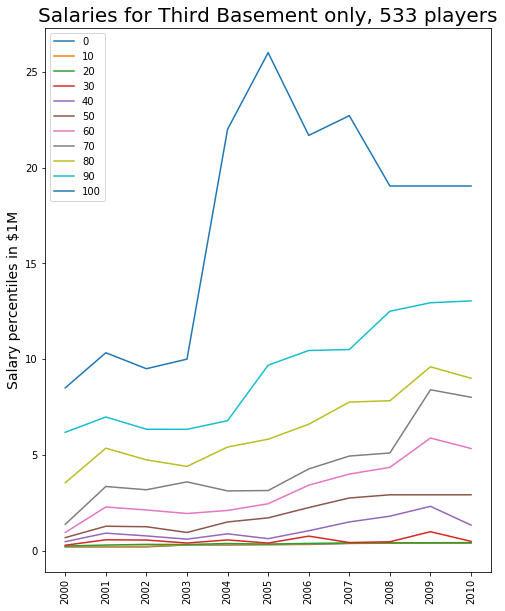

In [6]:
import matplotlib.pyplot as plt
df_pcts.plot( legend='upper left' )
plt.gcf().set_size_inches(8,10)
plt.title( f'Salaries for Third Basement only, {len(focus)} players', fontsize=20 )
plt.xticks( df_pcts.index, rotation=90 )
plt.ylabel( 'Salary percentiles in $1M', fontsize=14 )
plt.xlabel( None )
plt.show()

## Investigate Extreme Values

Makes you wonder who created the spikes on the graph...Let's find out.

In [5]:
focus.nlargest( 10, 'salary' ).reset_index( drop=True )

,name,pos,team,year,salary
0,Alex Rodriguez,3B,NYY,2005,26000000
1,Alex Rodriguez,3B,NYY,2007,22708525
2,Alex Rodriguez,3B,NYY,2004,22000000
3,Alex Rodriguez,3B,NYY,2006,21680727
4,Miguel Cabrera,3B,DET,2008,19037500
5,Miguel Cabrera,3B,DET,2009,19037500
6,Miguel Cabrera,3B,DET,2010,19037500
7,Miguel Cabrera,3B,DET,2008,19037500
8,Miguel Cabrera,3B,DET,2009,19037500
9,Miguel Cabrera,3B,DET,2010,19037500
